# import libraries

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import scipy  # Make sure to import scipy


# functions and constants

In [14]:

# Define path
data_dir = r'C:\Users\user\Documents\DS_WB\plant_recognition\plant_recog\data\images\plantvillage\color'

# images size
images_dim = (62,62)

# Image data generator with data augmentation for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data for validation
)

# Creating image generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=images_dim,
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=images_dim,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


# Define the model

In [16]:

# Define the model
# Define a simpler model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(images_dim[0], images_dim[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

# train the model and save it

In [17]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=150
)

# Save the model
model.save('plant_disease_model_simpler_epoch150_02.h5')

Epoch 1/150
1358/1358 [==============================] - 364s 267ms/step - loss: 2.6555 - accuracy: 0.2926 - val_loss: 1.9920 - val_accuracy: 0.4607
Epoch 2/150
1358/1358 [==============================] - 360s 265ms/step - loss: 1.9362 - accuracy: 0.4604 - val_loss: 1.5252 - val_accuracy: 0.5788
Epoch 3/150
1358/1358 [==============================] - 421s 310ms/step - loss: 1.6204 - accuracy: 0.5342 - val_loss: 1.3102 - val_accuracy: 0.6167
Epoch 4/150
1358/1358 [==============================] - 395s 291ms/step - loss: 1.4327 - accuracy: 0.5822 - val_loss: 1.1560 - val_accuracy: 0.6605
Epoch 5/150
1358/1358 [==============================] - 307s 226ms/step - loss: 1.3017 - accuracy: 0.6152 - val_loss: 1.0355 - val_accuracy: 0.6888
Epoch 6/150
1358/1358 [==============================] - 331s 243ms/step - loss: 1.2062 - accuracy: 0.6390 - val_loss: 0.9413 - val_accuracy: 0.7242
Epoch 7/150
1358/1358 [==============================] - 435s 320ms/step - loss: 1.1301 - accuracy: 0.6591

# evaluate the model

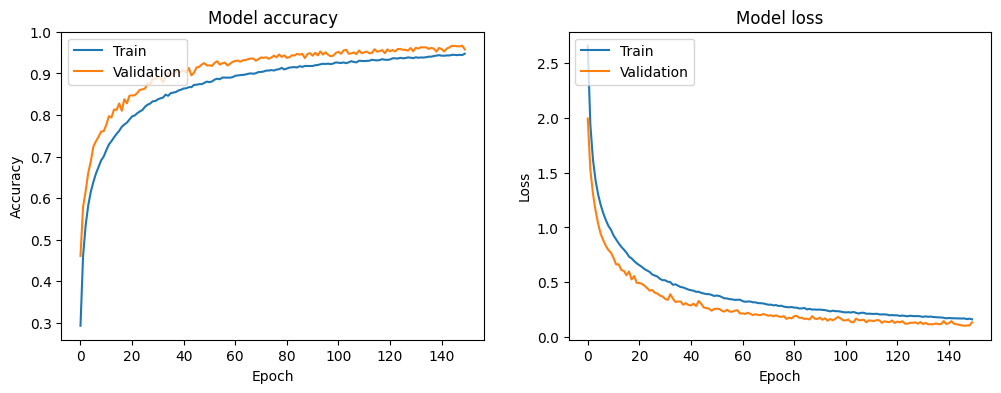

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# load the model and evalute it using images from valid folder

## print val and loss

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# Load the trained model
model = load_model('plant_disease_model_simpler_epoch150_02.h5')

# Define the path for the validation dataset
valid_dir = r'C:\Users\user\Documents\DS_WB\plant_recognition\plant_recog\data\images\plantvillage\valid'

# Image data generator for validation data (only rescaling)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Creating image generator for validation data
val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(62, 62),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')



Found 35144 images belonging to 38 classes.
1099/1099 [==============================] - 1722s 2s/step - loss: 2.4172 - accuracy: 0.7300
Validation Loss: 2.417181968688965
Validation Accuracy: 0.7299681305885315


## confusion_matrix

In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Found 35144 images belonging to 38 classes.
1099/1099 [==============================] - 357s 324ms/step


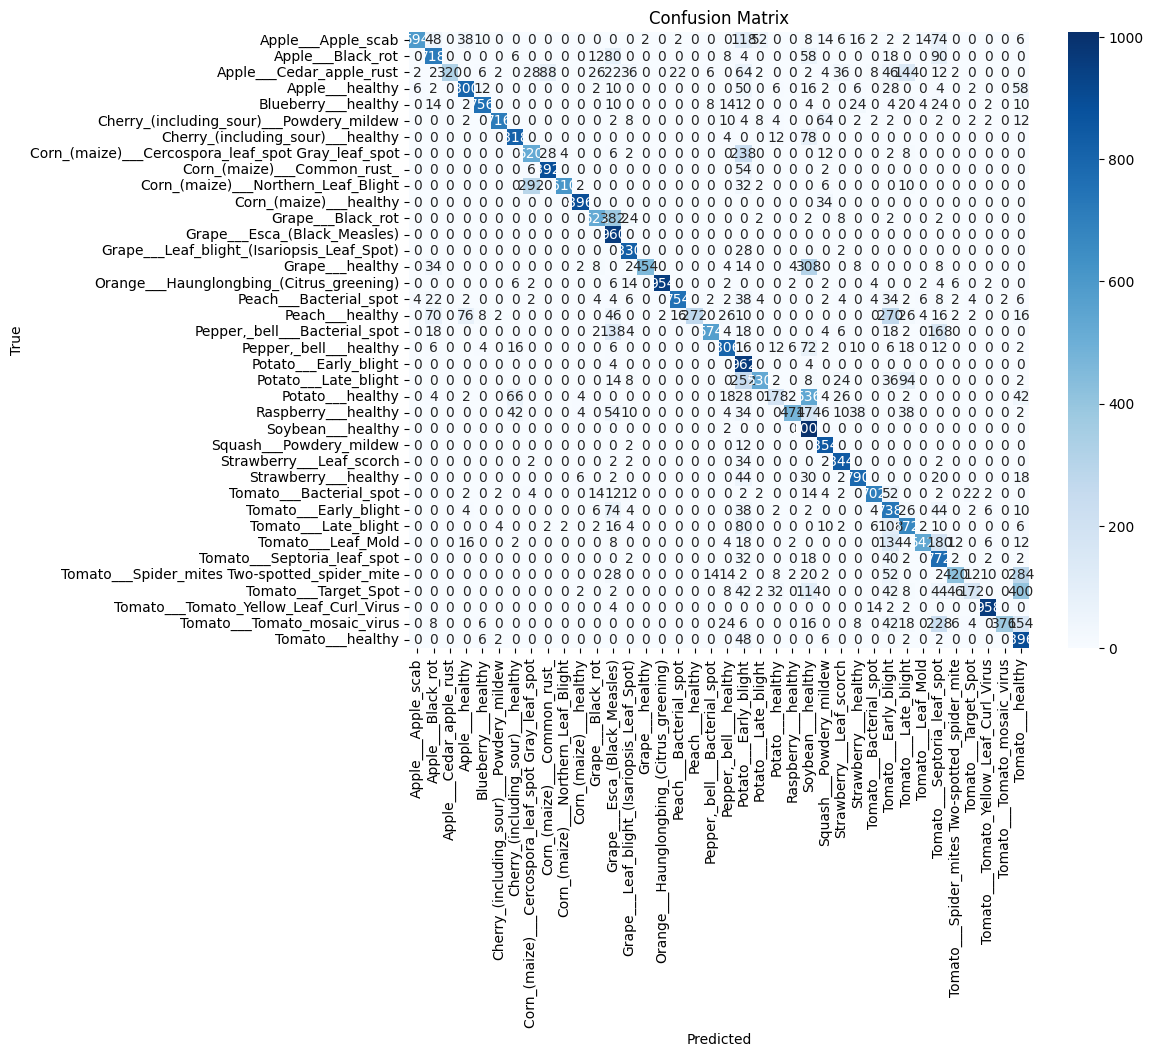

In [23]:

# Load the trained model
model = load_model('plant_disease_model_simpler_epoch150_02.h5')

# Define the path for the validation dataset
valid_dir = r'C:\Users\user\Documents\DS_WB\plant_recognition\plant_recog\data\images\plantvillage\valid'

# Image data generator for validation data (only rescaling)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Creating image generator for validation data
val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(62, 62),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict classes for the validation data
val_preds = model.predict(val_generator)
val_pred_classes = np.argmax(val_preds, axis=1)

# Get true classes from the generator
val_true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_classes, val_pred_classes)

# Create a crosstab
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(val_true_classes, val_pred_classes, target_names=class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.59      0.74      1008
                                 Apple___Black_rot       0.76      0.72      0.74       994
                          Apple___Cedar_apple_rust       1.00      0.36      0.53       880
                                   Apple___healthy       0.85      0.80      0.82      1004
                               Blueberry___healthy       0.94      0.83      0.88       908
          Cherry_(including_sour)___Powdery_mildew       0.98      0.85      0.91       842
                 Cherry_(including_sour)___healthy       0.86      0.90      0.88       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.61      0.63      0.62       820
                       Corn_(maize)___Common_rust_       0.88      0.94      0.91       954
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.64      0.